In [2]:
from sklearn.model_selection import train_test_split
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import sem
from scipy.stats import t

data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Wind\*.nc", parallel=True)

In [3]:
rain = np.array(data_rain['rainfall'])
winter_rain = rain[3::4]
summer_rain = rain[5::4]
spring_rain = rain[4::4]
autumn_rain = rain[6::4]
hurs = np.array(data_hurs['hurs'])
winter_hurs = hurs[3::4]
summer_hurs = hurs[5::4]
spring_hurs = hurs[4::4]
autumn_hurs = hurs[6::4]
temp = np.array(data_temp['tas'])
winter_temp = temp[3::4]
summer_temp = temp[5::4]
spring_temp = temp[4::4]
autumn_temp = temp[6::4]
temp_max = np.array(data_tmax['tasmax'])
winter_tmax = temp_max[3::4]
summer_tmax = temp_max[5::4]
spring_tmax = temp_max[4::4]
autumn_tmax = temp_max[6::4]
temp_min = np.array(data_tmin['tasmin'])
winter_tmin = temp_min[3::4]
summer_tmin = temp_min[5::4]
spring_tmin = temp_min[4::4]
autumn_tmin = temp_min[6::4]
sun = np.array(data_sun['sun'])
winter_sun = sun[3::4]
summer_sun = sun[5::4]
spring_sun = sun[4::4]
autumn_sun = sun[6::4]
frost = np.array(data_frost['groundfrost'])
winter_frost = frost[3::4]
summer_frost = frost[5::4]
spring_frost = frost[4::4]
autumn_frost = frost[6::4]
psl = np.array(data_psl['psl'])
winter_psl = psl[3::4]
summer_psl = psl[5::4]
spring_psl = psl[4::4]
autumn_psl = psl[6::4]
wind = np.array(data_wind['sfcWind'])
winter_wind = wind[3::4]
summer_wind = wind[5::4]
spring_wind = wind[4::4]
autumn_wind = wind[6::4]

In [4]:
temp_reduced = block_reduce(temp, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp))
tmax_reduced = block_reduce(temp_max, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_max))
tmin_reduced = block_reduce(temp_min, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_min))
rain_reduced = block_reduce(rain, block_size=(4, 1, 1), func=np.mean, cval=np.mean(rain))
hurs_reduced = block_reduce(hurs, block_size=(4, 1, 1), func=np.mean, cval=np.mean(hurs))
sun_reduced = block_reduce(sun, block_size=(4, 1, 1), func=np.mean, cval=np.mean(sun))
frost_reduced = block_reduce(frost, block_size=(4, 1, 1), func=np.mean, cval=np.mean(frost))
psl_reduced = block_reduce(psl, block_size=(4, 1, 1), func=np.mean, cval=np.mean(psl))
wind_reduced = block_reduce(wind, block_size=(4, 1, 1), func=np.mean, cval=np.mean(wind))

In [5]:
min_length = len(autumn_wind)
rain_reduced = rain_reduced[:min_length]
hurs_reduced = hurs_reduced[:min_length]
temp_reduced = temp_reduced[:min_length]
tmax_reduced = tmax_reduced[:min_length]
tmin_reduced = tmin_reduced[:min_length]
sun_reduced = sun_reduced[:min_length]
frost_reduced = frost_reduced[:min_length]
wind_reduced = wind_reduced[:min_length]
psl_reduced = psl_reduced[:min_length]
winter_rain = winter_rain[:min_length]
summer_rain = summer_rain[:min_length]
spring_rain = spring_rain[:min_length]
autumn_rain = autumn_rain[:min_length]
winter_hurs = winter_hurs[:min_length]
summer_hurs = summer_hurs[:min_length]
spring_hurs = spring_hurs[:min_length]
autumn_hurs = autumn_hurs[:min_length]
winter_temp = winter_temp[:min_length]
summer_temp = summer_temp[:min_length]
spring_temp = spring_temp[:min_length]
autumn_temp = autumn_temp[:min_length]
winter_tmax = winter_tmax[:min_length]
summer_tmax = summer_tmax[:min_length]
spring_tmax = spring_tmax[:min_length]
autumn_tmax = autumn_tmax[:min_length]
winter_tmin = winter_tmin[:min_length]
summer_tmin = summer_tmin[:min_length]
spring_tmin = spring_tmin[:min_length]
autumn_tmin = autumn_tmin[:min_length]
winter_sun = winter_sun[:min_length]
summer_sun = summer_sun[:min_length]
spring_sun = spring_sun[:min_length]
autumn_sun = autumn_sun[:min_length]
winter_frost = winter_frost[:min_length]
summer_frost = summer_frost[:min_length]
spring_frost = spring_frost[:min_length]
autumn_frost = autumn_frost[:min_length]
winter_psl = winter_psl[:min_length]
summer_psl = summer_psl[:min_length]
spring_psl = spring_psl[:min_length]
autumn_psl = autumn_psl[:min_length]
winter_wind = winter_wind[:min_length]
summer_wind = summer_wind[:min_length]
spring_wind = spring_wind[:min_length]
autumn_wind = autumn_wind[:min_length]

In [6]:
scaler = MinMaxScaler()

rain_reduced = scaler.fit_transform(rain_reduced.reshape(-1, 1)).flatten()
hurs_reduced = scaler.fit_transform(hurs_reduced.reshape(-1, 1)).flatten()
temp_reduced = scaler.fit_transform(temp_reduced.reshape(-1, 1)).flatten()
tmax_reduced = scaler.fit_transform(tmax_reduced.reshape(-1, 1)).flatten()
tmin_reduced = scaler.fit_transform(tmin_reduced.reshape(-1, 1)).flatten()
sun_reduced = scaler.fit_transform(sun_reduced.reshape(-1, 1)).flatten()
frost_reduced = scaler.fit_transform(frost_reduced.reshape(-1, 1)).flatten()
wind_reduced = scaler.fit_transform(wind_reduced.reshape(-1, 1)).flatten()
psl_reduced = scaler.fit_transform(psl_reduced.reshape(-1, 1)).flatten()
winter_rain = scaler.fit_transform(winter_rain.reshape(-1, 1)).flatten()
summer_rain = scaler.fit_transform(summer_rain.reshape(-1, 1)).flatten()
spring_rain = scaler.fit_transform(spring_rain.reshape(-1, 1)).flatten()
autumn_rain = scaler.fit_transform(autumn_rain.reshape(-1, 1)).flatten()
winter_hurs = scaler.fit_transform(winter_hurs.reshape(-1, 1)).flatten()
summer_hurs = scaler.fit_transform(summer_hurs.reshape(-1, 1)).flatten()
spring_hurs = scaler.fit_transform(spring_hurs.reshape(-1, 1)).flatten()
autumn_hurs = scaler.fit_transform(autumn_hurs.reshape(-1, 1)).flatten()
winter_temp = scaler.fit_transform(winter_temp.reshape(-1, 1)).flatten()
summer_temp = scaler.fit_transform(summer_temp.reshape(-1, 1)).flatten()
spring_temp = scaler.fit_transform(spring_temp.reshape(-1, 1)).flatten()
autumn_temp = scaler.fit_transform(autumn_temp.reshape(-1, 1)).flatten()
winter_tmax = scaler.fit_transform(winter_tmax.reshape(-1, 1)).flatten()
summer_tmax = scaler.fit_transform(summer_tmax.reshape(-1, 1)).flatten()
spring_tmax = scaler.fit_transform(spring_tmax.reshape(-1, 1)).flatten()
autumn_tmax = scaler.fit_transform(autumn_tmax.reshape(-1, 1)).flatten()
winter_tmin = scaler.fit_transform(winter_tmin.reshape(-1, 1)).flatten()
summer_tmin = scaler.fit_transform(summer_tmin.reshape(-1, 1)).flatten()
spring_tmin = scaler.fit_transform(spring_tmin.reshape(-1, 1)).flatten()
autumn_tmin = scaler.fit_transform(autumn_tmin.reshape(-1, 1)).flatten()
winter_sun = scaler.fit_transform(winter_sun.reshape(-1, 1)).flatten()
summer_sun = scaler.fit_transform(summer_sun.reshape(-1, 1)).flatten()
spring_sun = scaler.fit_transform(spring_sun.reshape(-1, 1)).flatten()
autumn_sun = scaler.fit_transform(autumn_sun.reshape(-1, 1)).flatten()
winter_frost = scaler.fit_transform(winter_frost.reshape(-1, 1)).flatten()
summer_frost = scaler.fit_transform(summer_frost.reshape(-1, 1)).flatten()
spring_frost = scaler.fit_transform(spring_frost.reshape(-1, 1)).flatten()
autumn_frost = scaler.fit_transform(autumn_frost.reshape(-1, 1)).flatten()
winter_psl = scaler.fit_transform(winter_psl.reshape(-1, 1)).flatten()
summer_psl = scaler.fit_transform(summer_psl.reshape(-1, 1)).flatten()
spring_psl = scaler.fit_transform(spring_psl.reshape(-1, 1)).flatten()
autumn_psl = scaler.fit_transform(autumn_psl.reshape(-1, 1)).flatten()
winter_wind = scaler.fit_transform(winter_wind.reshape(-1, 1)).flatten()
summer_wind = scaler.fit_transform(summer_wind.reshape(-1, 1)).flatten()
spring_wind = scaler.fit_transform(spring_wind.reshape(-1, 1)).flatten()
autumn_wind = scaler.fit_transform(autumn_wind.reshape(-1, 1)).flatten()

print(len(autumn_wind), len(temp_reduced), len(winter_rain), len(summer_sun))

486752 486752 486752 486752


In [7]:
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1970, 2023), x * y)
print(years_expanded.shape)
data_dict = {
    'Year': years_expanded,
    'Rain': rain_reduced,
    'Hurs': hurs_reduced,
    'Temperature': temp_reduced,
    'Tmax': tmax_reduced,
    'Tmin': tmin_reduced,
    'Sun': sun_reduced,
    'Frost': frost_reduced,
    'Wind': wind_reduced,
    'Psl': psl_reduced,
    'Winter Rain': winter_rain,
    'Summer Rain': summer_rain,
    'Spring Rain': spring_rain,
    'Autumn Rain': autumn_rain,
    'Winter Hurs': winter_hurs,
    'Summer Hurs': summer_hurs,
    'Spring Hurs': spring_hurs,
    'Autumn Hurs': autumn_hurs,
    'Winter Temp': winter_temp,
    'Summer Temp': summer_temp,
    'Spring Temp': spring_temp,
    'Autumn Temp': autumn_temp,
    'Winter Tmax': winter_tmax,
    'Summer Tmax': summer_tmax,
    'Spring Tmax': spring_tmax,
    'Autumn Tmax': autumn_tmax,
    'Winter Tmin': winter_tmin,
    'Summer Tmin': summer_tmin,
    'Spring Tmin': spring_tmin,
    'Autumn Tmin': autumn_tmin,
    'Winter Sun': winter_sun,
    'Summer Sun': summer_sun,
    'Spring Sun': spring_sun,
    'Autumn Sun': autumn_sun,
    'Winter Frost': winter_frost,
    'Summer Frost': summer_frost,
    'Spring Frost': spring_frost,
    'Autumn Frost': autumn_frost,
    'Winter Psl': winter_psl,
    'Summer Psl': summer_psl,
    'Spring Psl': spring_psl,
    'Autumn Psl': autumn_psl,
    'Winter Wind': winter_wind,
    'Summer Wind': summer_wind,
    'Spring Wind': spring_wind,
    'Autumn Wind': autumn_wind,
}


df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')

(486752,)


In [27]:
X = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']].values
y = df['Class'].map(lambda x: 1 if x == 'post_1990' else 0).values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)
X_test_tensor = torch.FloatTensor(X_test)

y_train_tensor = torch.tensor(y_train)
y_val_tensor = torch.tensor(y_val)
y_test_tensor = torch.tensor(y_test)

In [35]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(64, 1)
        self.output_activation = nn.Sigmoid()

        # Initialize intermediate outputs as None
        self.intermediate_outputs = None

    def forward(self, x):
        x = self.layer1(x)
        intermediate1 = self.activation(x)  # Store the output of the first layer
        x = self.layer2(intermediate1)
        intermediate2 = self.output_activation(x)  # Store the final output

        # Store intermediate outputs in a tuple
        self.intermediate_outputs = (intermediate1, intermediate2)

        return intermediate2

In [36]:
# Instantiate the model
input_size = X_train_tensor.shape[1]
model = NeuralNetwork(input_size)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [40]:
import matplotlib.pyplot as plt

# Training the model
num_epochs = 4000
train_losses = []  
val_losses = []   
train_accuracies = []  
val_accuracies = []    

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.float())
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
   
    # Training accuracy 
    with torch.no_grad():
        train_preds = (outputs >= 0.5).float()
        train_accuracy = (train_preds == y_train_tensor.float()).float().mean().item()
        train_accuracies.append(train_accuracy)
    
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_tensor).squeeze() # validating the model
        val_loss = criterion(val_outputs, y_val_tensor.float())

        # Validation accuracy
        val_preds = (val_outputs >= 0.5).float()
        val_accuracy = (val_preds == y_val_tensor.float()).float().mean().item()
        val_accuracies.append(val_accuracy)
        
epochs = range(1, len(train_losses) + 1)

val_predictions = (val_outputs >= 0.5).int() 
correct_predictions = (val_predictions == y_val_tensor.int()).sum().item()
total_samples = len(y_val_tensor)

Validation Loss: {0.0024439666885882616}
Final Training Accuracy: 1.0000
Final Validation Accuracy: 0.9994


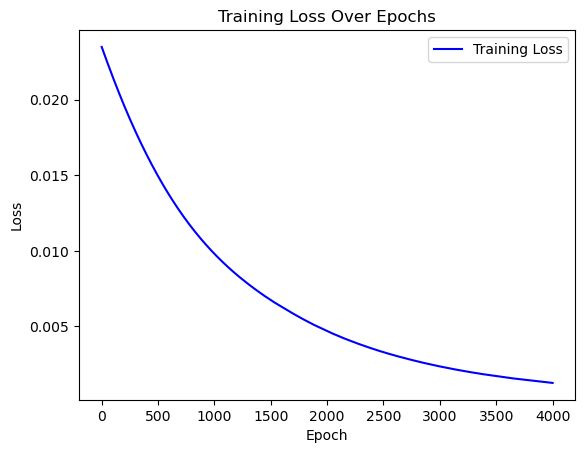

In [41]:
accuracy = correct_predictions / total_samples
print('Validation Loss:', {val_loss.item()})
final_train_accuracy = train_accuracies[-1]
final_val_accuracy = val_accuracies[-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

# Loss plot
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze().numpy()

model.eval()
with torch.no_grad():
    _ = model(X_test_tensor)  # Forward pass to store intermediate outputs
    intermediate1, intermediate2 = model.intermediate_outputs 

binary_predictions = (predictions > 0.5).astype(int)
    
accuracy = accuracy_score(y_test_tensor.numpy(), binary_predictions)
print(f'Accuracy: {accuracy:.3f}')

print("Classification Report:")
print(classification_report(y_test_tensor.numpy(), binary_predictions))

Accuracy: 1.000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5127
           1       1.00      1.00      1.00      8430

    accuracy                           1.00     13557
   macro avg       1.00      1.00      1.00     13557
weighted avg       1.00      1.00      1.00     13557



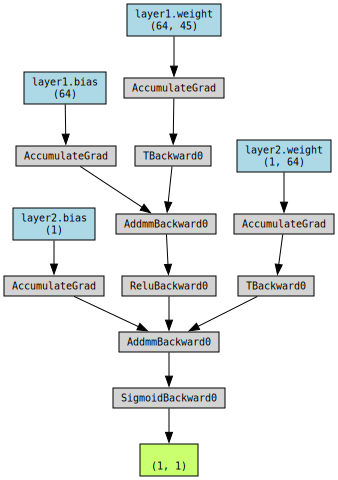

In [23]:
from torchviz import make_dot

model = NeuralNetwork(input_size=45)

# Create a dummy input tensor
dummy_input = torch.randn(1, 45)

# Pass the dummy input through the model to generate a graph
output = model(dummy_input)
graph = make_dot(output, params=dict(model.named_parameters()))

graph

In [13]:
from torchsummary import summary
import torch
import torch.nn as nn

model = NeuralNetwork(input_size=45) 

# Specify the device as a string
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

summary(model, input_size=(45,), device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]           2,944
              ReLU-2                   [-1, 64]               0
            Linear-3                    [-1, 1]              65
           Sigmoid-4                    [-1, 1]               0
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


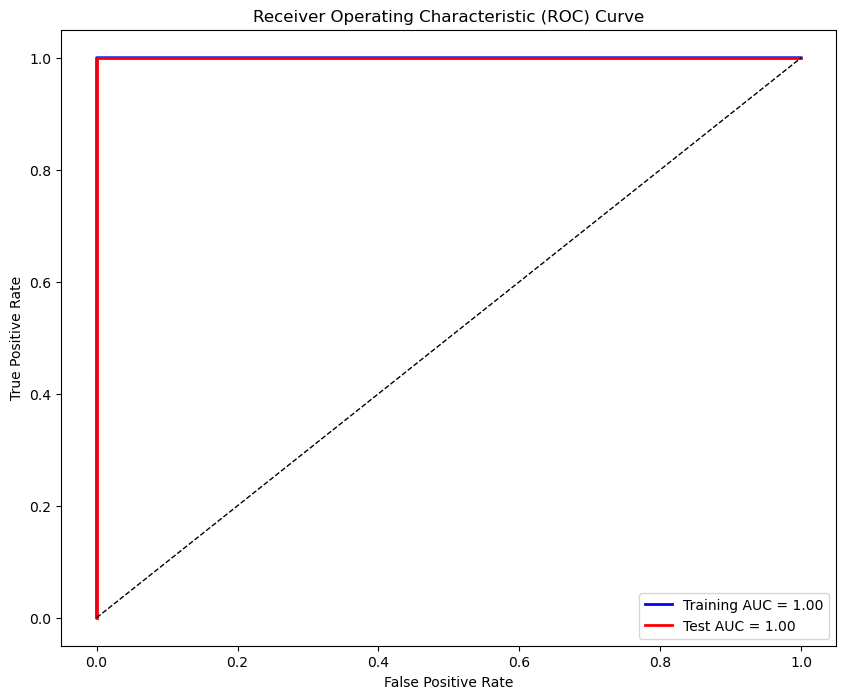

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model.eval()

# Get predicted probabilities for positive class on the test set
with torch.no_grad():
    test_predictions = model(X_test_tensor).squeeze().numpy()

# Get predicted probabilities for positive class on the training set
with torch.no_grad():
    train_predictions = model(X_train_tensor).squeeze().numpy()

# Calculate false positive rate, true positive rate, and thresholds for test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_tensor, test_predictions)

roc_auc_test = auc(fpr_test, tpr_test)

# Calculate false positive rate, true positive rate, and thresholds for training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_tensor, train_predictions)

roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

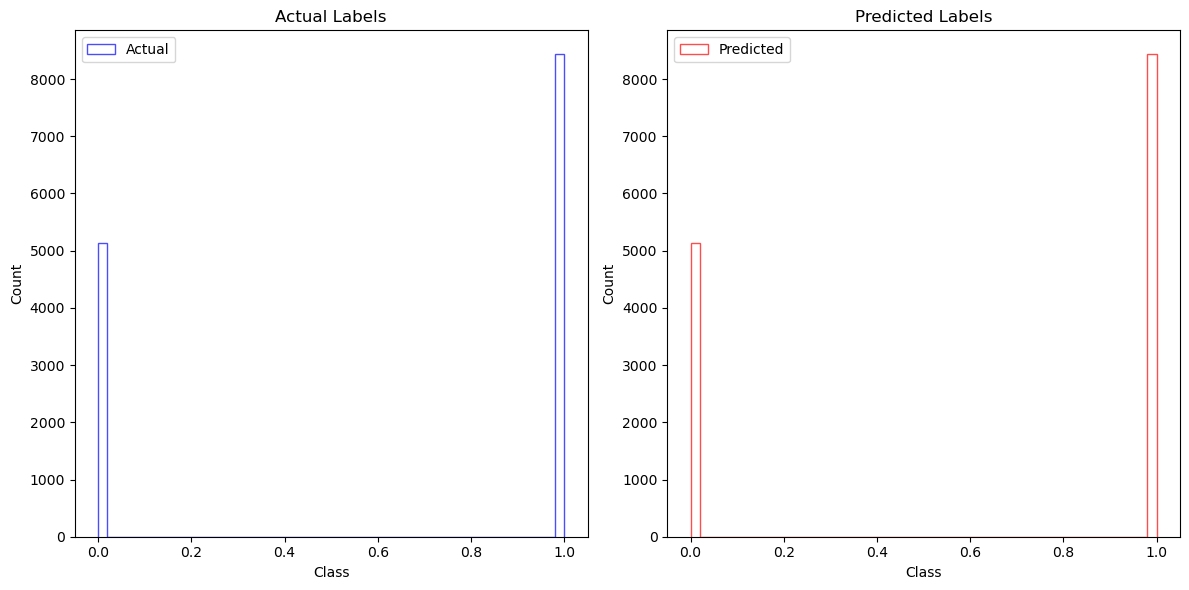

In [93]:
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Get predicted probabilities for positive class on the test set
with torch.no_grad():
    test_predictions = model(X_test_tensor).squeeze().numpy()

# Convert probabilities to binary predictions
binary_predictions = (test_predictions > 0.5).astype(int)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test_tensor.numpy(), bins=50, color='blue', alpha=0.7, label='Actual', histtype='step')
plt.title('Actual Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(binary_predictions, bins=50, color='red', alpha=0.7, label='Predicted', histtype='step')
plt.title('Predicted Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
from captum.attr import IntegratedGradients

ig = IntegratedGradients(model)

# Choose a specific instance from the test set
input_instance = X_test_tensor[0]
input_instance = input_instance.view(1, -1)

# Compute feature attributions
attributions, _ = ig.attribute(input_instance, target=0, return_convergence_delta=True)

print("Feature Attributions:", attributions)

C:\Users\iarla\miniconda3\envs\jupyter-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Feature Attributions: tensor([[-1.9274e-06, -1.4052e-05,  1.3805e-04, -6.4938e-05, -8.1016e-05,
         -1.0348e-04, -5.6140e-05, -4.2305e-05, -8.6542e-05,  1.4574e-05,
         -3.2200e-05,  1.9824e-05,  1.1104e-05, -2.6001e-05, -7.2087e-05,
          8.7483e-06,  6.6036e-06,  6.3799e-05,  1.1801e-04,  1.5197e-04,
         -8.8124e-06, -1.0805e-04, -6.2398e-05, -1.9091e-05, -1.1595e-04,
          1.1902e-04, -1.8548e-04,  1.3104e-05, -4.6334e-05,  1.1872e-04,
         -1.7441e-05,  9.6372e-05, -1.2816e-05,  2.5469e-05,  1.5106e-05,
          3.0617e-05, -1.0255e-04,  1.3712e-04, -7.1298e-06,  1.7942e-04,
         -3.3345e-05, -1.0313e-05,  4.3309e-05,  3.2960e-05, -3.5296e-05]],
       dtype=torch.float64)


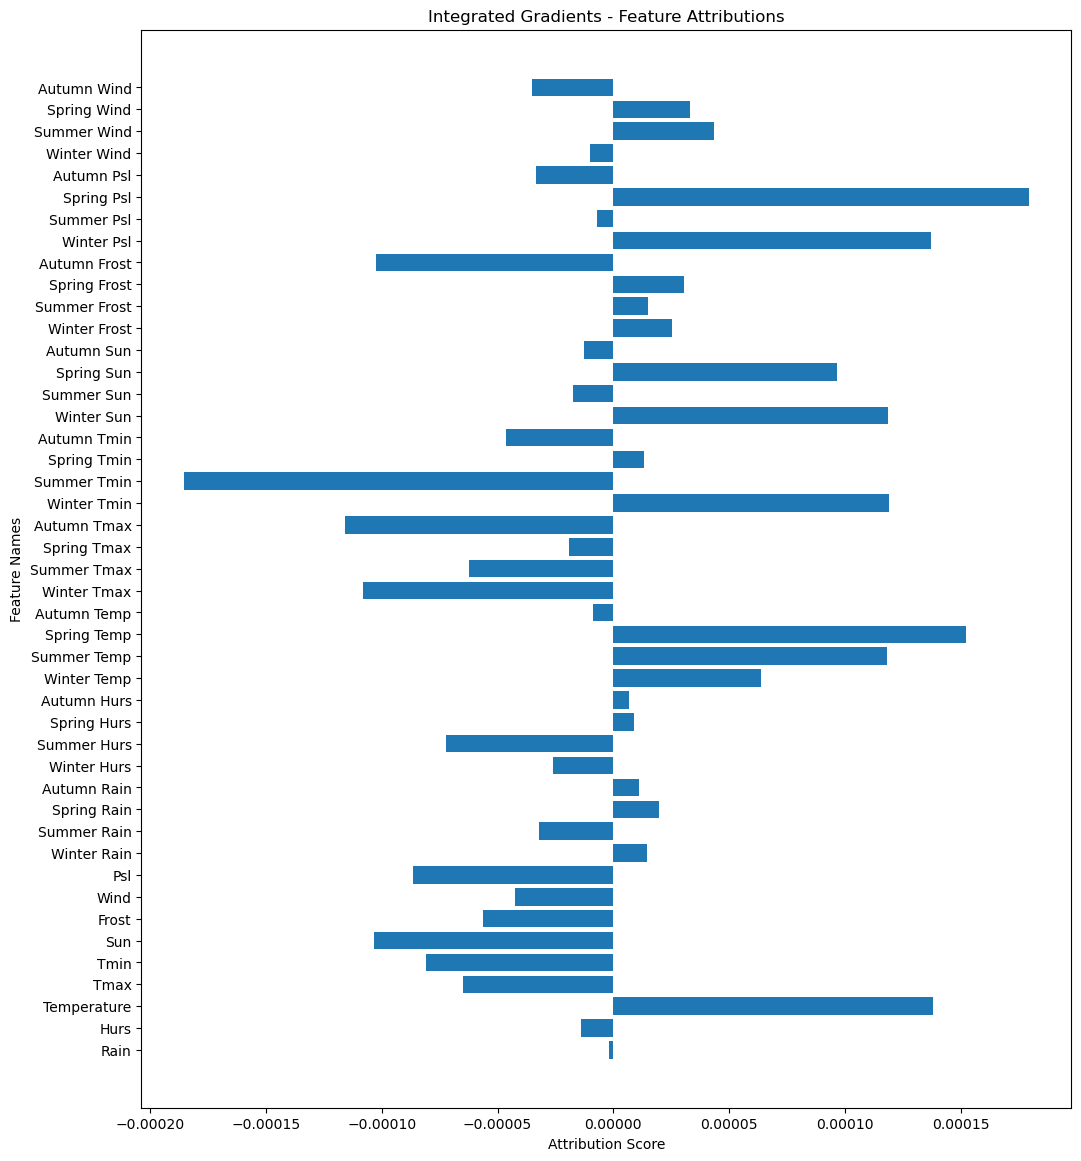

In [45]:
feature_names = ['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
                 'Sun', 'Frost', 'Wind', 'Psl',
                 'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
                 'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
                 'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
                 'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
                 'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
                 'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
                 'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
                 'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
                 'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']

# Convert the tensor to a numpy array
attributions_np = attributions.numpy()

# Create a bar plot
plt.figure(figsize=(12, 14))
plt.barh(feature_names, attributions_np[0])
plt.title('Integrated Gradients - Feature Attributions')
plt.xlabel('Attribution Score')
plt.ylabel('Feature Names')
plt.show()

In [46]:
data_shape = X_test_tensor.shape
print("Data shape:", data_shape)


Data shape: torch.Size([13557, 45])


In [47]:
from sklearn.metrics import confusion_matrix

# Set the model to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze().numpy()

# Convert predictions to binary
binary_predictions = (predictions > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), binary_predictions)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5125    2]
 [   1 8429]]


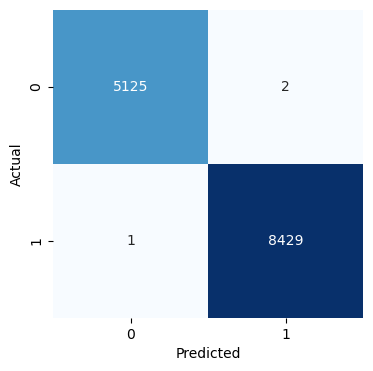

In [48]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

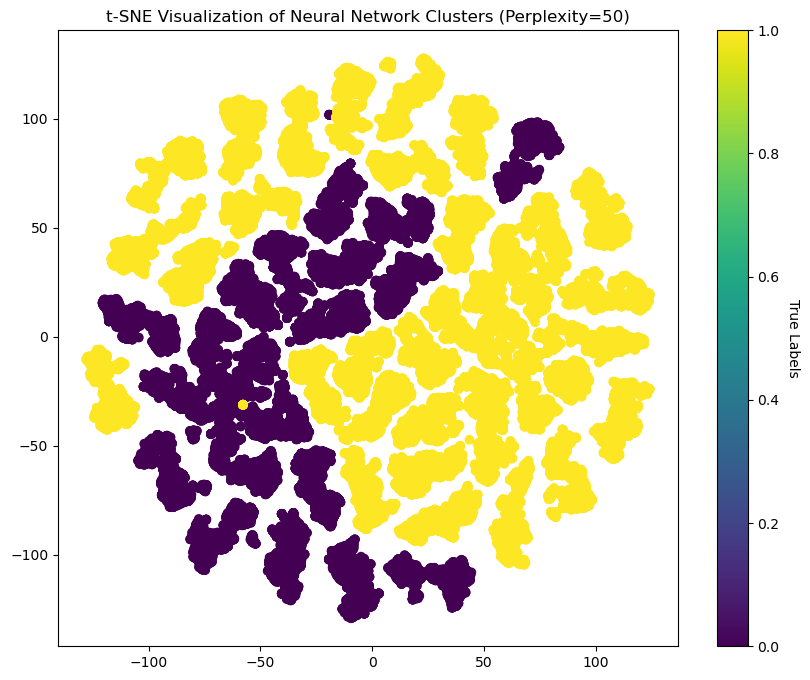

In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

model.eval()

# Convert X to a PyTorch tensor
X_tensor = torch.FloatTensor(X)

with torch.no_grad():
    _ = model(X_tensor)  # Forward pass to store intermediate outputs
    intermediate1, intermediate2 = model.intermediate_outputs

# Set the perplexity for t-SNE
perplexity_value = 50  
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_result = tsne.fit_transform(intermediate1.numpy())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='viridis')

cbar = plt.colorbar(scatter)
cbar.set_label('True Labels', rotation=270, labelpad=15)

plt.title(f't-SNE Visualization of Neural Network Clusters (Perplexity={perplexity_value})')
plt.show()

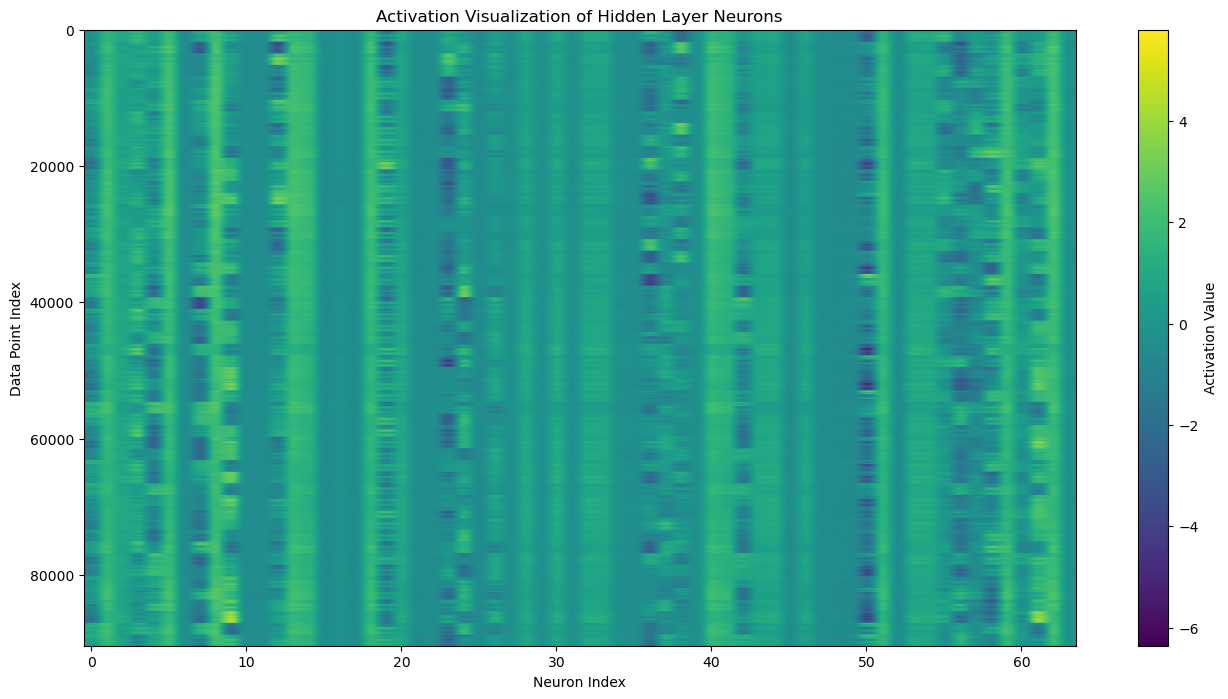

In [51]:
model.eval()  # Set the model to evaluation mode
X_tensor = torch.from_numpy(X).float()  # Convert X to a PyTorch tensor

with torch.no_grad():
    # Get activations from the hidden layer
    activations = model.layer1(X_tensor)

# Plot activation values for each neuron
plt.figure(figsize=(16, 8))
plt.imshow(activations.numpy(), cmap='viridis', aspect='auto')
plt.colorbar(label='Activation Value')
plt.title('Activation Visualization of Hidden Layer Neurons')
plt.xlabel('Neuron Index')
plt.ylabel('Data Point Index')
plt.show()

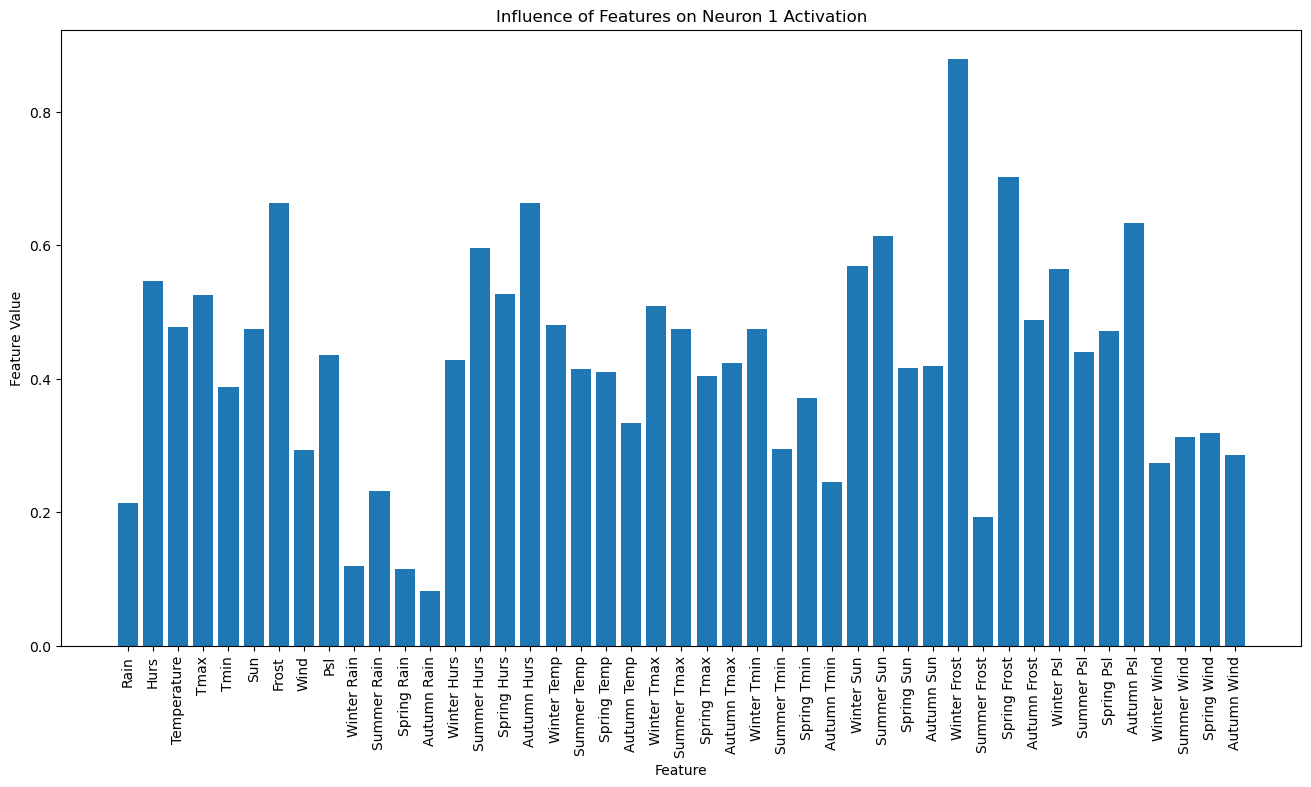

In [52]:
from torchvision import transforms

data_point_index = 0  

# Set the model to evaluation mode
model.eval()

# Forward pass to get the intermediate outputs
with torch.no_grad():
    intermediate_outputs = model(X_tensor)

# Choose a specific neuron index in the hidden layer
neuron_index = 0

# Extract the activation values for the chosen neuron
activation_values = intermediate_outputs[0][0].item()

# Display the corresponding data point
data_point = X_tensor[data_point_index].numpy()

feature_names = ['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
                 'Sun', 'Frost', 'Wind', 'Psl',
                 'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
                 'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
                 'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
                 'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
                 'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
                 'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
                 'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
                 'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
                 'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind'] 

plt.figure(figsize=(16, 8))
plt.bar(range(len(data_point)), data_point)
plt.xlabel('Feature')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.ylabel('Feature Value')
plt.title(f'Influence of Features on Neuron 1 Activation')
plt.show()

## UMAP

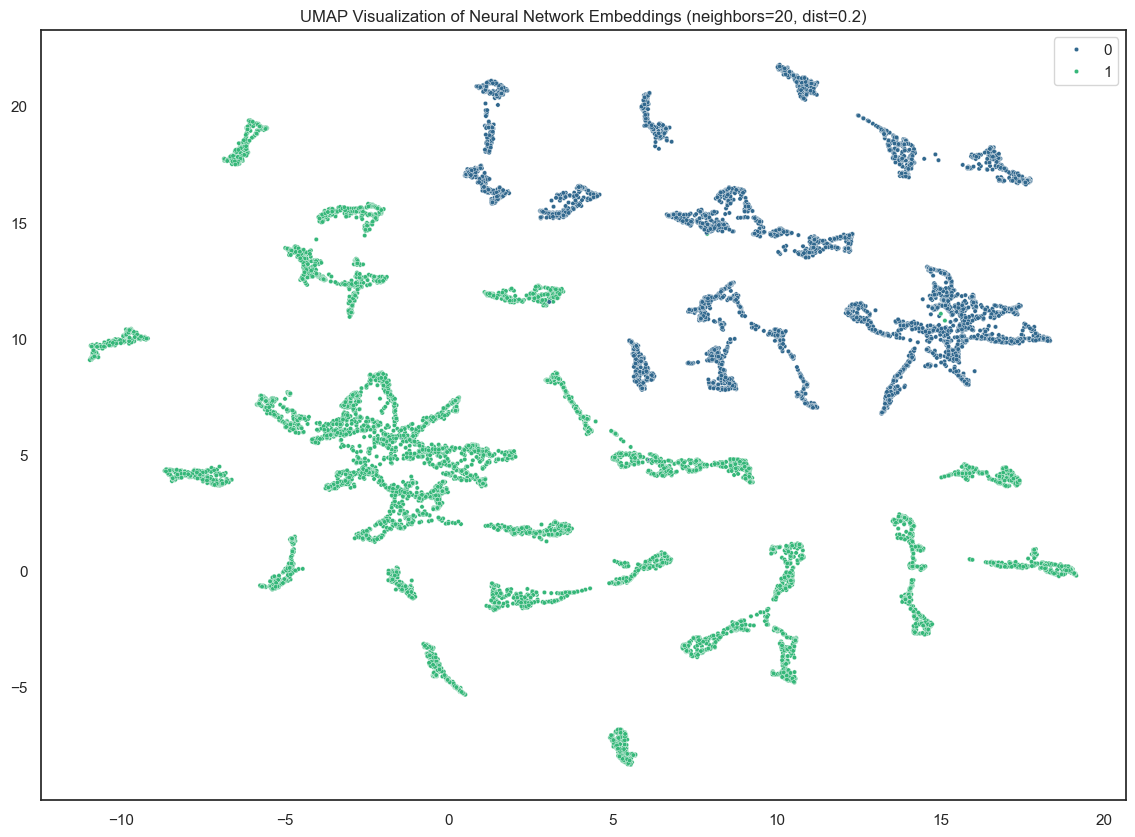

In [63]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model.eval()
with torch.no_grad():
    _ = model(X_test_tensor)  # Forward pass to store intermediate outputs
    intermediate1, intermediate2 = model.intermediate_outputs 

# Get the embeddings from the first hidden layer (intermediate1)
embeddings = intermediate1.numpy()

# Apply UMAP
umap_embedding = umap.UMAP(n_neighbors=20, min_dist=0.2, metric='euclidean').fit_transform(embeddings)

# Assuming 'labels' is your true labels
labels = y_test_tensor.numpy()

# Check lengths
if len(umap_embedding) != len(labels):
    raise ValueError("Lengths of umap_embedding and labels must be the same.")

# Create a scatter plot
sns.set(style='white', context='notebook', rc={'figure.figsize': (14, 10)})
sns.scatterplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], hue=labels, palette='viridis', s=10)
plt.title('UMAP Visualization of Neural Network Embeddings (neighbors=20, dist=0.2)')
plt.show()
